In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
import matplotlib.cm as cmx
from random import randint


In [30]:
filenames = ['kowalska_gamma.csv', 'kowalska_high_energy_protons.csv', 'kowalska_sobp_protons.csv']

In [31]:
dicentric_data = pd.read_csv('dicentric_formation_lit_data.csv')
print(dicentric_data.columns.tolist())
k2019_data = dicentric_data[dicentric_data['Paper'] == 'Kowalska 2019']
k2019_data
Bettega_data = dicentric_data[dicentric_data['Paper']=='Bettega 1981']
Bettega_data

['Paper', 'Cell type', 'Radiation type', 'Beam info', 'Energy (MeV)', 'Error in energy (MeV)', 'LET(keV/um)', 'Dose (Gy)', 'No. of cells scored', 'Dicentrics per 100 cells', 'Error in dicentrics', 'Plot Index']


,Paper,Cell type,Radiation type,Beam info,Energy (MeV),Error in energy (MeV),LET(keV/um),Dose (Gy),No. of cells scored,Dicentrics per 100 cells,Error in dicentrics,Plot Index
18,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,0.0,565,0.0,0.0,3
19,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,0.5,25,4.0,4.0,3
20,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,1.0,171,8.0,2.0,3
21,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,1.5,77,13.0,4.0,3
22,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,2.0,210,20.0,10.0,3
23,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,3.0,122,46.0,8.0,3
24,Bettega 1981,human EUE,Proton,NaN,31.0,0.3,1.83,5.0,97,90.0,10.0,3
25,Bettega 1981,human EUE,Proton,NaN,12.0,0.5,3.99,0.0,255,0.0,0.0,4
26,Bettega 1981,human EUE,Proton,NaN,12.0,0.5,3.99,0.5,202,6.0,3.0,4
27,Bettega 1981,human EUE,Proton,NaN,12.0,0.5,3.99,1.0,110,14.0,4.0,4


In [32]:
marker_dict = {'Proton':'P','X-ray':'x','Gamma':'o','Carbon':'$c$'}
#paper_dict = {''}

def plot_by_paper(paper_title,data_pd):
    
    pd_paper = data_pd[data_pd['Paper']==paper_title]
    
    plot_indices = np.unique(pd_paper['Plot Index'].tolist())
    print(plot_indices)

    fig,ax = plt.subplots(figsize=(12,12))
    for i in plot_indices:

        sub_pd = pd_paper[pd_paper['Plot Index'] == i]
        radiation_type = sub_pd['Radiation type'].iloc[0]
        energy = sub_pd['Energy (MeV)'].iloc[0]


        plt.plot(sub_pd['Dose (Gy)'], sub_pd['Dicentrics per 100 cells'], 
                 marker=marker_dict["{}".format(radiation_type)],
                 label="{} {} MeV".format(radiation_type,energy))

    plt.legend()
    plt.xlabel('Dose, Gy')
    plt.ylabel('Dicentrics per 100 cells')
    plt.title('{}'.format(paper_title))


def plot_all(data_pd):
    
    plot_indices = np.unique(data_pd['Plot Index'].tolist())
    papers = np.unique(data_pd['Paper'].tolist())
    
    fig,ax = plt.subplots(figsize=(12,12))
    
    for j,paper in enumerate(papers):
        paper_pd = data_pd[data_pd['Paper'] == paper]

        rand_color = (np.random.uniform(),np.random.uniform(),np.random.uniform())
        col = plt.cm.jet(j/len(papers))   
        
        plot_indices = np.unique(paper_pd['Plot Index'].tolist())

        for i in plot_indices:

            sub_pd = paper_pd[paper_pd['Plot Index'] == i]
            
            radiation_type = sub_pd['Radiation type'].iloc[0]
            energy = sub_pd['Energy (MeV)'].iloc[0]


            plt.plot(sub_pd['Dose (Gy)'], sub_pd['Dicentrics per 100 cells'], 
                     color=col,marker=marker_dict["{}".format(radiation_type)],
                     label="{} {} MeV".format(radiation_type,energy))

    plt.legend()
    plt.xlabel('Dose, Gy')
    plt.ylabel('Dicentrics per 100 cells')
    plt.title('Dicentrics vs Dose For all Literature')
plot_all(dicentric_data)

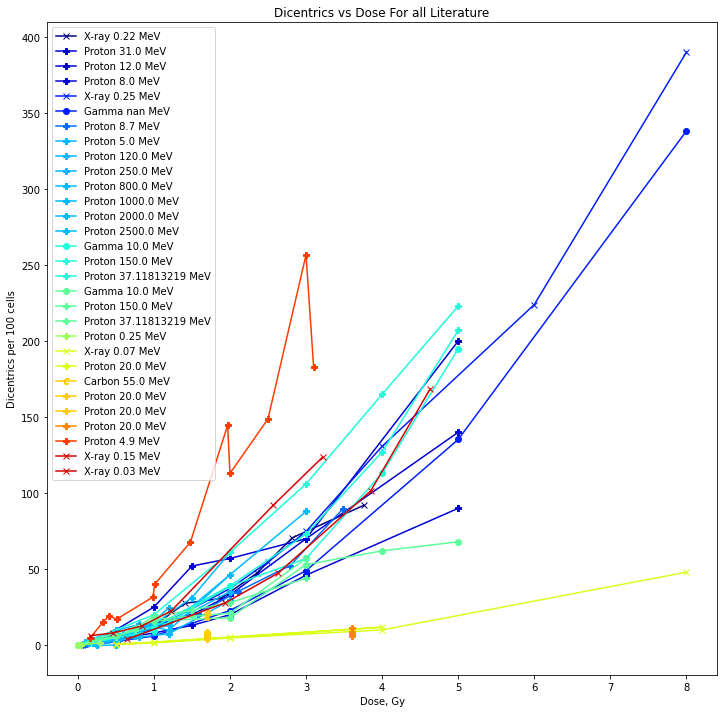

In [37]:
"""
for i in range(data.shape[1]-1):
    plt.plot(data[:,0], data[:,i+1], marker=markers[i%3], color=colors[i//3], ls="none")

f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]

handles = [f("s", colors[i]) for i in range(3)]
handles += [f(markers[i], "k") for i in range(3)]

labels = colors + ["star", "triangle", "circle"]
"""
def plot_all_2(data_pd):
    
    plot_indices = np.unique(data_pd['Plot Index'].tolist())
    papers = np.unique(data_pd['Paper'].tolist())
    fig,ax = plt.subplots(figsize=(12,12))
    
    jet = plt.get_cmap('jet') 
    cNorm  = colors.Normalize(vmin=0, vmax=len(papers))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    
    for j,paper in enumerate(papers):
        paper_pd = data_pd[data_pd['Paper'] == paper]

        rand_color = (np.random.uniform(),np.random.uniform(),np.random.uniform())
        colorVal = scalarMap.to_rgba(j)  
        
        plot_indices = np.unique(paper_pd['Plot Index'].tolist())

        for i in plot_indices:

            sub_pd = paper_pd[paper_pd['Plot Index'] == i]
            
            radiation_type = sub_pd['Radiation type'].iloc[0]
            energy = sub_pd['Energy (MeV)'].iloc[0]


            plt.plot(sub_pd['Dose (Gy)'], sub_pd['Dicentrics per 100 cells'], 
                     color=colorVal,marker=marker_dict["{}".format(radiation_type)],
                     label="{} {} MeV".format(radiation_type,energy))

    plt.legend()
    plt.xlabel('Dose, Gy')
    plt.ylabel('Dicentrics per 100 cells')
    plt.title('Dicentrics vs Dose For all Literature')
plot_all_2(dicentric_data)

[3 4 5]


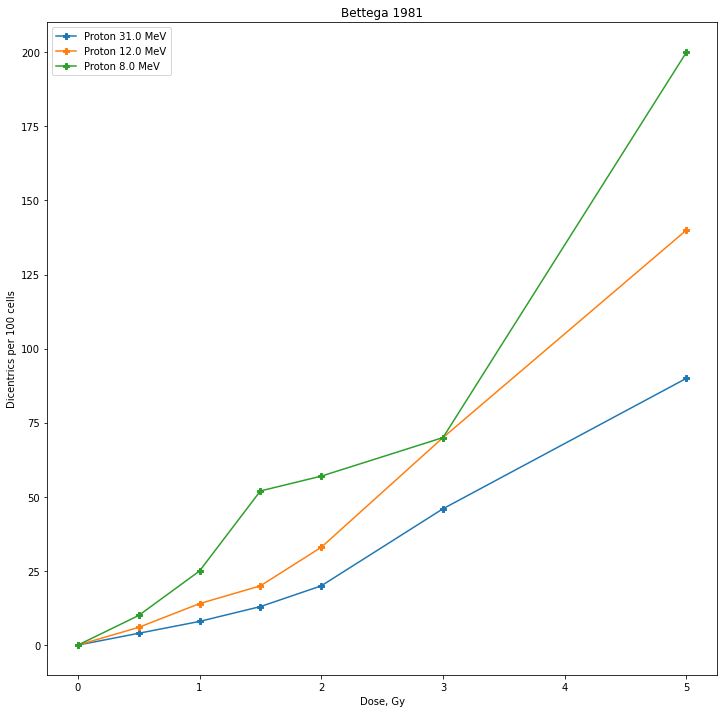

In [35]:
plot_by_paper('Bettega 1981',dicentric_data)

['Gamma Co-60 10.0' 'Gamma nan 10.0' 'Proton SOBP 37.11813219'
 'Proton nan 150.0']


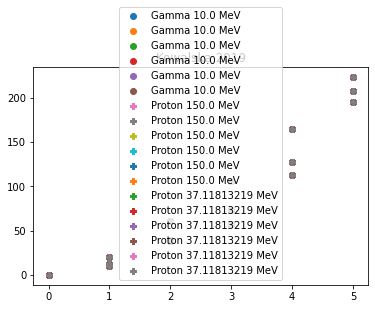

In [12]:
#plt.plot(k2019_data['Dose (Gy)'], k2019_data['Dicentrics per 100 cells'], marker='.', label='Co-60 Gamma')

def gen_labels():
    
    labels = np.array([])
    
    for i in np.arange(len(k2019_data.index)):
        
        labels = np.append(labels,("{} {} {}".format(k2019_data['Radiation type'].iloc[i],
                                   k2019_data['Beam info'].iloc[i],k2019_data['Energy (MeV)'].iloc[i])))
        
    return np.unique(labels)


marker_dict = {'Proton':'P','X-ray':'x','Gamma':'o' }

unique_labels = gen_labels()
print(unique_labels)

for i in np.arange(len(k2019_data.index)):
    
    radiation_type = k2019_data['Radiation type'].iloc[i]
    energy = k2019_data['Energy (MeV)'].iloc[i]
    
    plt.scatter(k2019_data['Dose (Gy)'], k2019_data['Dicentrics per 100 cells'], 
                marker=marker_dict[radiation_type], 
                label="{} {} MeV".format(radiation_type,energy))
    
plt.title(k2019_data['Paper'].iloc[0])
plt.legend()
    
    
    
#for i in np.arange(len(k2019_data.index)):
    
    

In [ ]:

plt.plot(pd_gamma.iloc[:,0], pd_gamma.iloc[:,2], marker='.', label='Co-60 Gamma')
plt.plot(pd_high_energy_protons.iloc[:,0], pd_high_energy_protons.iloc[:,2], marker='x', label='150 MeV protons')
plt.plot(pd_sobp_protons.iloc[:,0], pd_sobp_protons.iloc[:,2], marker='v', label='SOBP protons (37 MeV)')
plt.xlabel('Dose, Gy')
plt.ylabel('Dicentrics per 100 cells')
plt.title('Kowalska (2019)')
plt.legend()

## Scrap/Old Code


In [3]:
pd_gamma = pd.read_csv(filenames[0])
pd_high_energy_protons = pd.read_csv(filenames[1])
pd_sobp_protons = pd.read_csv(filenames[2])

FileNotFoundError: [Errno 2] No such file or directory: 'kowalska_gamma.csv'

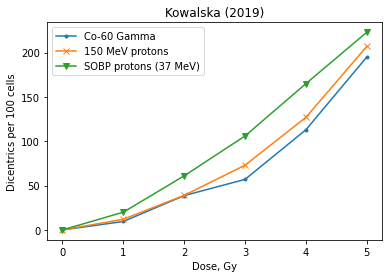

In [24]:
plt.plot(pd_gamma.iloc[:,0], pd_gamma.iloc[:,2], marker='.', label='Co-60 Gamma')
plt.plot(pd_high_energy_protons.iloc[:,0], pd_high_energy_protons.iloc[:,2], marker='x', label='150 MeV protons')
plt.plot(pd_sobp_protons.iloc[:,0], pd_sobp_protons.iloc[:,2], marker='v', label='SOBP protons (37 MeV)')
plt.xlabel('Dose, Gy')
plt.ylabel('Dicentrics per 100 cells')
plt.title('Kowalska (2019)')
plt.legend()